# Imports

In [1]:
%conda init bash

no change     /home/arcweld/anaconda3/condabin/conda
no change     /home/arcweld/anaconda3/bin/conda
no change     /home/arcweld/anaconda3/bin/conda-env
no change     /home/arcweld/anaconda3/bin/activate
no change     /home/arcweld/anaconda3/bin/deactivate
no change     /home/arcweld/anaconda3/etc/profile.d/conda.sh
no change     /home/arcweld/anaconda3/etc/fish/conf.d/conda.fish
no change     /home/arcweld/anaconda3/shell/condabin/Conda.psm1
no change     /home/arcweld/anaconda3/shell/condabin/conda-hook.ps1
no change     /home/arcweld/anaconda3/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /home/arcweld/anaconda3/etc/profile.d/conda.csh
no change     /home/arcweld/.bashrc
No action taken.

Note: you may need to restart the kernel to use updated packages.


In [53]:
%conda install -c anaconda scikit-learn
%conda install matplotlib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done

## Package Plan ##

  environment location: /home/arcweld/anaconda3/envs/ee

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       he6710b0_2         375 KB
    cycler-0.10.0              |   py39h06a4308_0          16 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    glib-2.69.0                |       h5202010_0         1.7 MB
    kiwisolver-1.3.1           |   py39h2531618_0          80 KB
    lz4-c-1.9.3                |       h295c915_1         185 KB
    matplotlib-3.4.2           |   py39h06a4308_0          26 KB
    matplotlib-base-3.4.2      |   py39hab158f2_0         5.6 MB
    munkres-1.1.4              |             py_0

In [54]:
import sys
import os

import numpy as np
import itertools

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt

# Load Data

In [9]:
%cd ..

/home/arcweld/Documents/1_Projects/data_science_studies/DSI/Capstones/DSI_Capstone_3


In [7]:
sys.path.append('src/')

In [12]:
from src.data import make_dataset
X, y = make_dataset.fetch_training_data(data_path=os.path.join('data','raw'), nrows=500)
X_test, y_test = make_dataset.fetch_testing_data(data_path=os.path.join('data','raw'), nrows=200)

# KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier

In [ ]:
# K-NNC
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)

# Predict the labels of test data

knn_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")

print(classification_report(y_test, knn_pred))

# Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

# Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)

# LGBM
https://lightgbm.readthedocs.io/en/latest/index.html

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

# Parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=15
params['num_class']=6 #no.of unique values in the target class not inclusive of the end value

clf = lgb.train(params, d_train, 100)

# prediction
lgb_predictions = clf.predict(X_test)
lgb_pred = np.argmax(lgb_predictions, axis=1)

# Accuracy and Classification Report
print(f"Accuracy: {accuracy_score(y_test, lgb_pred)*100}")
print(classification_report(y_test, lgb_pred))

## k-Means

Prepare data

In [26]:
X.reshape(500, -1).shape

(500, 3136)

In [44]:
np.where(y==1)[1]

array([2, 1, 5, 5, 5, 0, 0, 5, 1, 2, 5, 1, 1, 4, 5, 2, 5, 3, 3, 1, 5, 1,
       1, 2, 2, 1, 5, 5, 5, 3, 1, 1, 1, 3, 5, 5, 5, 3, 3, 1, 0, 5, 3, 5,
       5, 5, 3, 3, 5, 3, 2, 1, 5, 2, 3, 5, 1, 1, 5, 2, 2, 2, 2, 2, 1, 3,
       5, 3, 5, 2, 2, 5, 0, 3, 5, 5, 3, 3, 5, 1, 5, 0, 5, 1, 5, 2, 1, 1,
       3, 3, 1, 2, 2, 2, 1, 5, 5, 5, 3, 5, 5, 5, 3, 5, 3, 3, 3, 1, 3, 2,
       5, 1, 1, 1, 5, 0, 5, 3, 0, 3, 0, 2, 0, 3, 5, 1, 1, 0, 1, 5, 2, 4,
       1, 5, 5, 1, 5, 1, 5, 3, 5, 5, 2, 5, 3, 2, 2, 0, 5, 5, 1, 5, 5, 5,
       2, 1, 3, 3, 1, 5, 5, 5, 5, 1, 1, 2, 2, 3, 3, 5, 5, 5, 5, 1, 3, 3,
       5, 2, 3, 1, 2, 2, 5, 2, 1, 5, 5, 3, 1, 2, 1, 5, 1, 1, 1, 5, 2, 2,
       3, 1, 5, 5, 5, 5, 5, 0, 1, 3, 1, 5, 3, 2, 4, 3, 5, 1, 1, 1, 2, 1,
       3, 5, 5, 2, 5, 5, 1, 2, 1, 5, 5, 0, 5, 2, 5, 5, 1, 0, 3, 5, 2, 5,
       3, 1, 5, 3, 5, 3, 5, 3, 5, 1, 0, 5, 2, 5, 5, 3, 4, 1, 0, 5, 5, 5,
       1, 5, 2, 5, 5, 3, 5, 3, 1, 1, 2, 5, 5, 3, 5, 1, 5, 5, 2, 0, 5, 1,
       2, 5, 2, 1, 1, 5, 3, 5, 3, 2, 2, 4, 5, 1, 2,

In [42]:
np.argwhere(1)

1

In [45]:
data, labels = X.reshape(500, -1), np.where(y==1)[1]
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 6; # samples: 500; # features 3136


In [69]:
maxk = 7
wcss = np.zeros(maxk)
silhouette = np.zeros(maxk)

for k in range(1,maxk):
    km = KMeans(k)
    y_pred = km.fit_predict(data)   
    
    for c in range(0, k):
        for i1, i2 in itertools.combinations([ i for i in range(len(y_pred)) if y_pred[i] == c ], 2):
            wcss[k] += sum(data[i1] - data[i2])**2
    wcss[k] /= 2
    
    if k > 1:
        silhouette[k] = silhouette_score(data,labels)


Text(0, 0.5, 'within-cluster sum of squares')

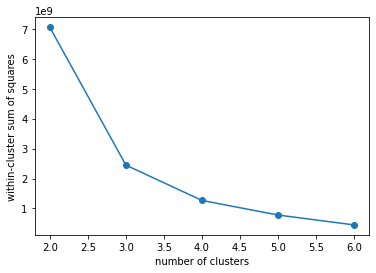

In [70]:
fig, ax = plt.subplots()
ax.plot(range(2,maxk), wcss[2:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("within-cluster sum of squares")

In [ ]:
km = KMeans(k)
y_pred = km.fit_predict(data)

In [73]:
i = 120
print(y_pred[i], labels[i])

0 0


5